In [2]:
import fenics as f
import matplotlib.pyplot as plt
from models import velocity_field, t_transport_sim, mesh_2d

----------  Running for dT=0 K  ----------*** Warning: Matplotlib plotting backend does not support mesh function of dim 1. Continuing without plotting...

Running for factor=1.0e-03
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
Running for factor=1.0e-02  Newton iteration 0: r (abs) = 4.569e+04 (tol = 1.000e-09) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 4.986e-13 (tol = 1.000e-09) r (rel) = 1.091e-17 (tol = 1.000e-09)
  Newton solver finished in 1 iterations and 1 linear solver iterations.

No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
Running for factor=1.0e-01
  Newton iteration 0: r (abs) = 4.986e-13 (tol = 1.000e-09) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton solver finished in 0 iterations and 0 linear solver iterations.
No 

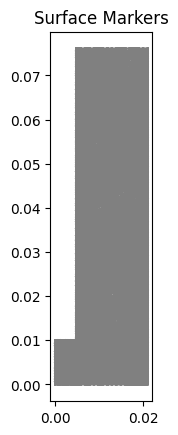

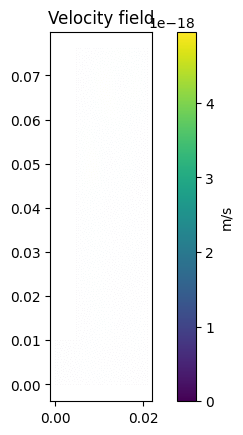

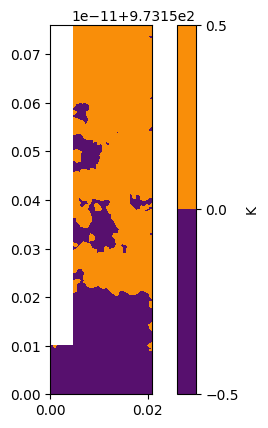

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.10 s


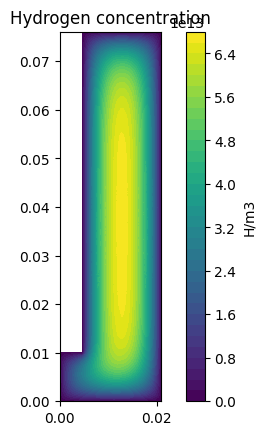

Total surface: 1.48e-02 m2
Total flux: 1.75e+05 H/s/m
Average concentration: 3.92e+13 H/m3
k: 3.02e-07 m/s
3.021160454792301e-07 39214807829524.58 174859.5200751692
(3.021160454792301e-07, array(3.92148078e+13), 174859.5200751692)
----------  Running for dT=0.05 K  ----------
Running for factor=1.0e-03
Running for factor=1.0e-02
Running for factor=1.0e-01
Running for factor=1.0e+00


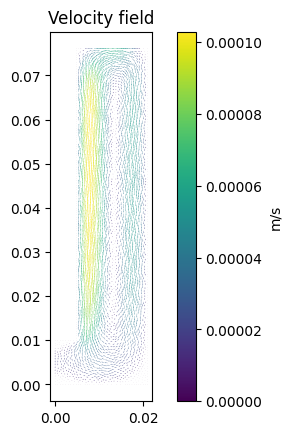

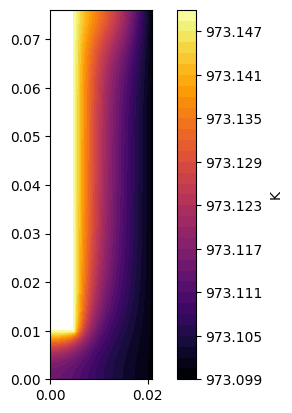

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.10 s


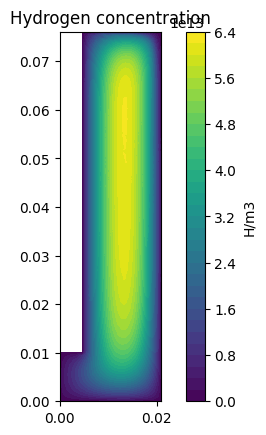

Total surface: 1.48e-02 m2
Total flux: 1.68e+05 H/s/m
Average concentration: 3.59e+13 H/m3
k: 3.18e-07 m/s
3.1760521159720867e-07 35932456403066.37 168437.9422118028
(3.1760521159720867e-07, array(3.59324564e+13), 168437.9422118028)
----------  Running for dT=0.1 K  ----------
Running for factor=1.0e-03
Running for factor=1.0e-02
Running for factor=1.0e-01
Running for factor=1.0e+00


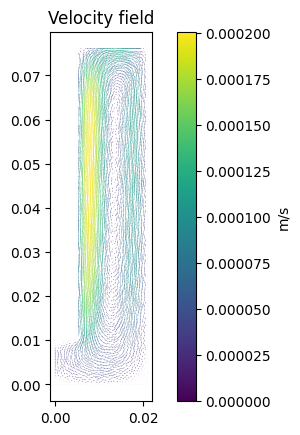

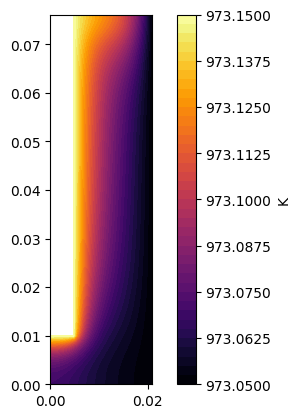

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.10 s


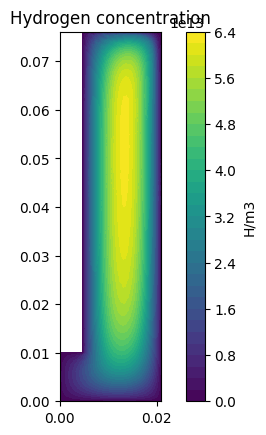

Total surface: 1.48e-02 m2
Total flux: 1.64e+05 H/s/m
Average concentration: 3.53e+13 H/m3
k: 3.15e-07 m/s
3.1470685023265803e-07 35344277488083.9 164168.83037934083
(3.1470685023265803e-07, array(3.53442775e+13), 164168.83037934083)
----------  Running for dT=0.15 K  ----------
Running for factor=1.0e-03
Running for factor=1.0e-02
Running for factor=1.0e-01
Running for factor=1.0e+00


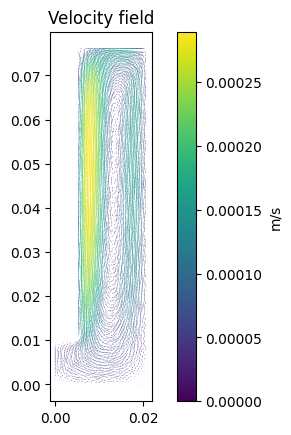

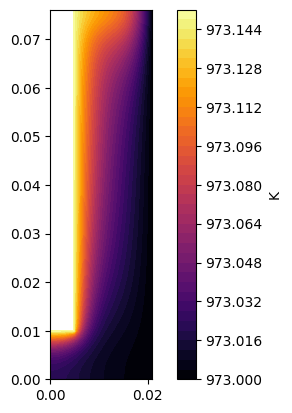

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.10 s


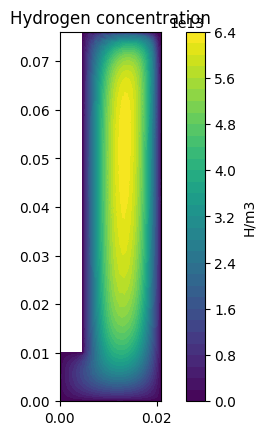

Total surface: 1.48e-02 m2
Total flux: 1.62e+05 H/s/m
Average concentration: 3.50e+13 H/m3
k: 3.13e-07 m/s
3.126193593742418e-07 35010532801339.406 161539.96646729458
(3.126193593742418e-07, array(3.50105328e+13), 161539.96646729458)
----------  Running for dT=0.2 K  ----------
Running for factor=1.0e-03
Running for factor=1.0e-02
Running for factor=1.0e-01
Running for factor=1.0e+00


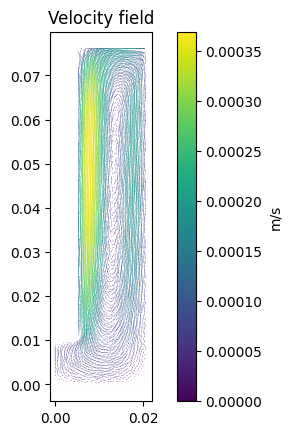

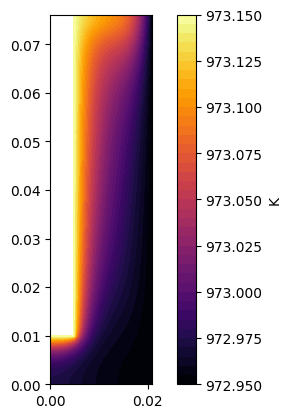

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.10 s


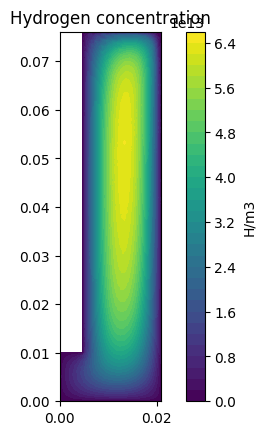

Total surface: 1.48e-02 m2
Total flux: 1.60e+05 H/s/m
Average concentration: 3.48e+13 H/m3
k: 3.11e-07 m/s
3.111607714467994e-07 34788201880146.15 159765.212277252
(3.111607714467994e-07, array(3.47882019e+13), 159765.212277252)
----------  Running for dT=0.25 K  ----------
Running for factor=1.0e-03
Running for factor=1.0e-02
Running for factor=1.0e-01
Running for factor=1.0e+00


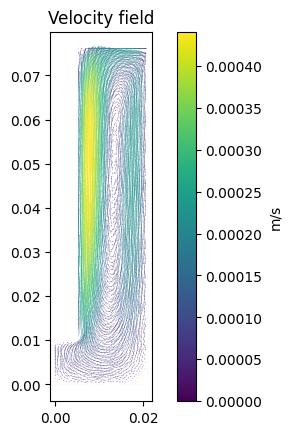

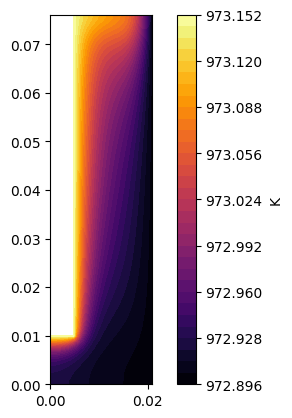

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.10 s


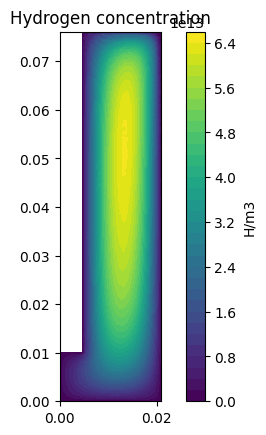

Total surface: 1.48e-02 m2
Total flux: 1.58e+05 H/s/m
Average concentration: 3.46e+13 H/m3
k: 3.10e-07 m/s
3.1010490239729344e-07 34625032038446.85 158476.26075073273
(3.1010490239729344e-07, array(3.4625032e+13), 158476.26075073273)


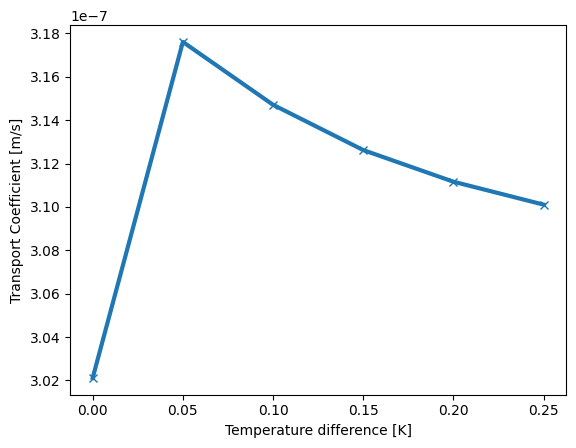

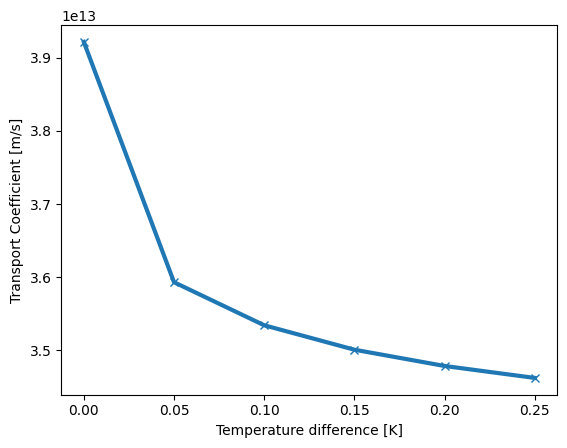

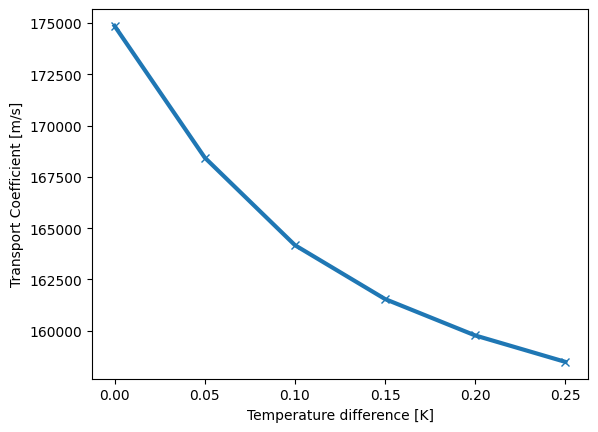

In [3]:
if __name__ == "__main__":
    # Generating mesh
    # x1 = 0.00476
    # x2 = 0.0162
    # y1 = 0.01
    # y2 = 0.0761
    # resolution = 30
    # mesh_fenics, surface_markers, left_id, top_id, right_id, bottom_id, upper_left_id, left_top_id = LMeshmshr(x1, x2, y1, y2, resolution)

    mesh_fenics, volume_markers, surface_markers, correspondance_dict = mesh_2d()

    T_hot = 700 + 273.15
    dt_array = [0, 0.05, 0.1, 0.15, 0.2, 0.25]
    k_array = []
    c_array = []
    f_array = []
    for dT in dt_array:
        print(f"----------  Running for dT={dT} K  ----------")
        foldername = f"Results/dt={dT}/"
        T_cold = T_hot - dT
        u, p, T = velocity_field(
            T_cold=T_cold,
            T_hot=T_hot,
            my_mesh=mesh_fenics,
            surface_markers=surface_markers,
            correspondance_dict=correspondance_dict,
        )

        f.XDMFFile(foldername + "temperature_field.xdmf").write_checkpoint(
            T, "temperature", 1, f.XDMFFile.Encoding.HDF5
        )
        f.XDMFFile(foldername + "velocity_field.xdmf").write(u)

        plt.figure()
        plt.title("Velocity field")
        CS = f.plot(u, scale=1e-3)
        plt.colorbar(CS, label="m/s")
        plt.show()

        plt.figure()
        TS = f.plot(T, cmap="inferno")
        plt.colorbar(TS, label="K")
        plt.show()

        k = t_transport_sim(
            T,
            mesh_fenics,
            u,
            volume_markers=volume_markers,
            surface_markers=surface_markers,
            correspondance_dict=correspondance_dict,
        )
        print(k)
        k_array.append(k[0])
        c_array.append(k[1])
        f_array.append(k[2])

    plt.figure()
    plt.plot(dt_array, k_array, "-x", linewidth=3)
    plt.xlabel("Temperature difference [K]")
    plt.ylabel("Transport Coefficient [m/s]")

    plt.figure()
    plt.plot(dt_array, c_array, "-x", linewidth=3)
    plt.xlabel("Temperature difference [K]")
    plt.ylabel("Average Concentration")

    plt.figure()
    plt.plot(dt_array, f_array, "-x", linewidth=3)
    plt.xlabel("Temperature difference [K]")
    plt.ylabel("Flux")

    # xdmf_file = XDMFFile("mesh_fencis.xdmf")
    # xdmf_file.write(mesh_fenics)
    # xdmf_file.close()